<img src="https://en.wikipedia.org/wiki/Twitter#/media/File:X_logo_2023.svg" align="center"> <h2 align="center">Logistic Regression: A Sentiment Analysis Case Study</h2>

### Introduction
___

- X (twitter dataset): Pep Guardiola
- Dataset: https://github.com/zenklinov/tweepy/blob/main/get.ipynb
- Model: https://github.com/zenklinov/Regression_Logistic_-_Sentiment_Analysis_Movie_Data/blob/main/logistic_regression_model.joblib

<b>Features: bag of 1-grams with TF-IDF values</b>:
- Extremely sparse feature matrix - close to 97% are zeros

<b>Wordcloud</b>:
- Creating wordcloud after Preprocessing Text

 <b>Model: Logistic regression</b>
- $p(y = 1|x) = \sigma(w^{T}x)$
- Linear classification model
- Can handle sparse data
- Fast to train
- Weights can be interpreted
<img src="https://i.imgur.com/VieM41f.png" align="center" width=500 height=500>

### Step 1: Loading the dataset
---

In this section, the code loads a dataset using the pd.read_csv function from the Pandas library. The dataset is stored in a Pandas DataFrame object named df. Additionally, the first five rows of the DataFrame are displayed using the head() function.

In [5]:
import pandas as pd

# Load data
df = pd.read_csv(r'D:\Workspace_vs_code\Scrapping\twitter\pep2.csv')

# Show 5 rows
print(df.head())

   Unnamed: 0                                               text
0           0  @FabrizioRomano @TheEuropeanLad Pep Guardiola:...
1           1  Pep Guardiola says it's tough for his players ...
2           2  Today’s Manchester Evening News back page:\nPE...
3           3  🔵📈 Pep Guardiola on Man City’s crisis: “We WIL...
4           4  Who else loves sport ⚽?\n#SpotifyPremium #Spot...


### Step 2: Preprocessing Text
---

This section focuses on text preprocessing tasks. It includes several subtasks such as removing HTML tags, converting text to lowercase, removing non-alphanumeric characters, extracting emoticons, and tokenizing words. The text preprocessing functions defined are preprocessor(), tokenizer(), and tokenizer_porter(). The cleaned text is stored in a new column named 'clean_review' in the DataFrame.

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if necessary
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def clean_text(text):
    # Remove mentions, hashtags, URLs, and special characters
    text = re.sub(r'@\w+|#\w+|http\S+|www\S+|[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join(word for word in words if word not in stop_words)
    return cleaned_text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first 5 rows after preprocessing
df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,@FabrizioRomano @TheEuropeanLad Pep Guardiola:...,pep guardiola give players back youll see man ...
1,Pep Guardiola says it's tough for his players ...,pep guardiola says tough players defend legacy...
2,Today’s Manchester Evening News back page:\nPE...,todays manchester evening news back page pep w...
3,🔵📈 Pep Guardiola on Man City’s crisis: “We WIL...,pep guardiola man citys crisis stand return sure
4,Who else loves sport ⚽?\n#SpotifyPremium #Spot...,else loves sport


### Step 3: Wordcloud & Most Frequent Words
---

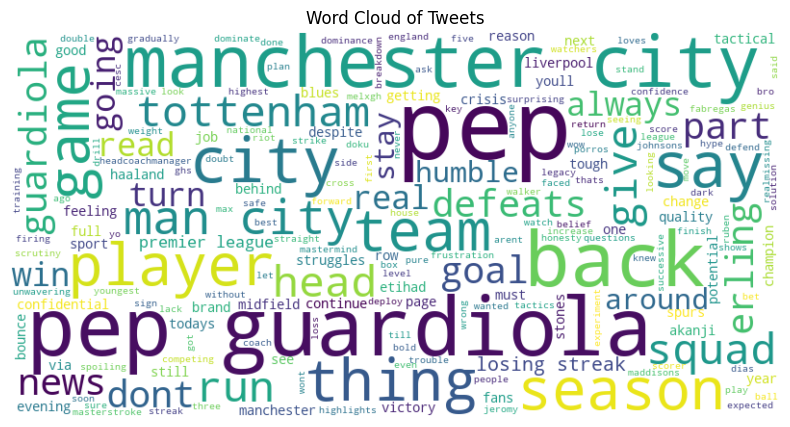

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string for the word cloud
all_text = ' '.join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()


           Word  Frequency
0           pep         14
8          city         14
1     guardiola         11
28   manchester         10
4          back          8
41         peps          8
26       season          5
33        citys          5
7           man          5
61       streak          4
2          give          4
187   tottenham          4
3       players          4
81       things          4
63       league          4
49        squad          3
257      humble          3
140     premier          3
136        real          3
132        read          3


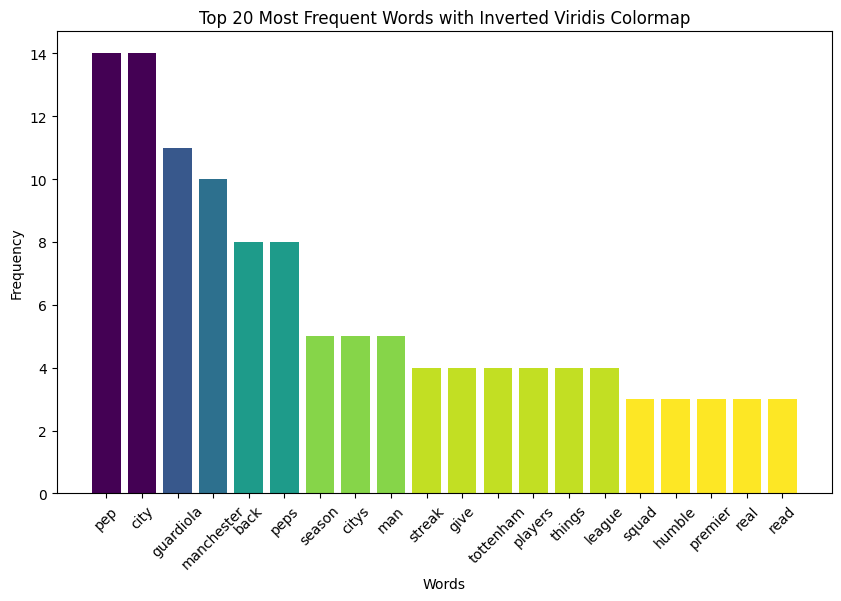

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import viridis_r
from matplotlib.colors import Normalize

# Split all cleaned text into individual words
all_words = ' '.join(df['cleaned_text']).split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Convert the counts to a DataFrame for easier analysis
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 20 most frequent words
print(word_freq_df.head(20))

# Prepare inverted viridis colormap
top_words = word_freq_df.head(20)
norm = Normalize(vmin=min(top_words['Frequency']), vmax=max(top_words['Frequency']))
colors = [viridis_r(norm(value)) for value in top_words['Frequency']]

# Show a bar plot of the top 20 most frequent words with inverted viridis
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Frequency'], color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


### Step 4: Feature Extraction, Word relevancy using term frequency-inverse document frequency (TF-IDF Vectorization)

In this part, the text data is transformed into TF-IDF (Term Frequency-Inverse Document Frequency) vectors using the TfidfVectorizer from scikit-learn. TF-IDF vectorization converts text documents into numerical representations, where each word's importance is weighted based on its frequency in the document and across the entire corpus.

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$

where $n_d$ is the total number of documents, and df(d, t) is the number of documents d that contain the term t.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF vectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        tokenizer=tokenizer_porter,
                        token_pattern=None,  # Explicitly disable default pattern
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

The equations for the idf and tf-idf that are implemented in scikit-learn are:

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$
The tf-idf equation that is implemented in scikit-learn is as follows:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

### Step 5: Load Model
---

In [41]:
#Load the Model
from joblib import load

# Load the saved Logistic Regression model
lr = load(r'D:\Workspace_vs_code\Text\logistic_regression_model.joblib')

# Load the saved TfidfVectorizer
tfidf = load(r'D:\Workspace_vs_code\Text\tfidf_vectorizer.joblib')

In [42]:
# Example: Using the model to analyze new data
new_data = ["The movie was fantastic! I loved it."]
new_data_tfidf = tfidf.transform(new_data)
predictions = lr.predict(new_data_tfidf)

print("Predictions for new data:", predictions)

Predictions for new data: [1]


### Step 6: Perform Prediction Sentiment for all data
---

In this section, the code predicts the sentiment (positive or negative) for all the data in the DataFrame using the trained logistic regression model. Here's a summary of what each part of the code does:

- **Predict Sentiment for All Data**: The TF-IDF vectorizer (`tfidf`) transforms all the cleaned review text data (`df['clean_text']`) into TF-IDF vectors (`all_data_tfidf`).

- **Make Predictions**: The logistic regression model (`lr`) predicts the sentiment labels for all the TF-IDF vectors, storing the predicted sentiment labels in the `all_data_predictions` array.

- **Add Predictions to DataFrame**: The predicted sentiment labels are added as a new column named 'predicted_sentiment' to the original DataFrame (`df`).

- **Display Results**: Finally, a subset of the DataFrame containing the original review text and the predicted sentiment labels is printed to the console using the `print()` function.


In [43]:
# Predict sentiment for all data
all_data_tfidf = tfidf.transform(df['cleaned_text'])
all_data_predictions = lr.predict(all_data_tfidf)

# Add predictions to DataFrame
df['predicted_sentiment'] = all_data_predictions

# Display results
print(df[['cleaned_text', 'predicted_sentiment']])


                                         cleaned_text  predicted_sentiment
0   pep guardiola give players back youll see man ...                    1
1   pep guardiola says tough players defend legacy...                    1
2   todays manchester evening news back page pep w...                    1
3    pep guardiola man citys crisis stand return sure                    1
4                                    else loves sport                    1
5   peps frustration realmissing key players still...                    1
6                               pep confidential part                    0
7                               pep confidential part                    0
8                                    max also got row                    1
9   guardiola highlights solution man city crisis ...                    1
10     pep guardiola manchester city champions league                    1
11             wow goal youngest scorer cesc fabregas                    0
12  ruben dias jeromy dok

### Step 7: Visualize Sentiment
---

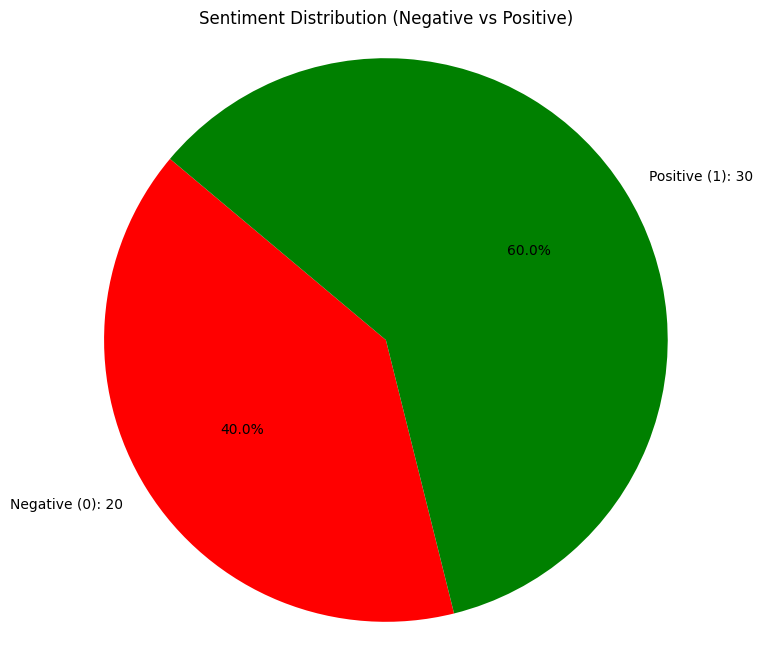

Negative Sentiment: 20
Positive Sentiment: 30


In [48]:
# Count the occurrences of each sentiment (0 and 1)
sentiment_counts = df['predicted_sentiment'].value_counts()

# Extract counts for positive and negative sentiments
negative_count = sentiment_counts.get(0, 0)
positive_count = sentiment_counts.get(1, 0)

# Define labels and values for the pie chart
labels = [f'Negative (0): {negative_count}', f'Positive (1): {positive_count}']
sizes = [negative_count, positive_count]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Sentiment Distribution (Negative vs Positive)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

# Print the counts for reference
print(f"Negative Sentiment: {negative_count}")
print(f"Positive Sentiment: {positive_count}")


### Step 8: Save into csv
---

In [11]:
# Define the file path
file_path = r'D:\Workspace_vs_code\Text\movie_reviews_pep.csv'

# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print("DataFrame has been successfully saved to:", file_path)


DataFrame has been successfully saved to: D:\Workspace_vs_code\Text\movie_reviews_pep.csv


In [14]:
# Define the file path
file_path = r'D:\Workspace_vs_code\Text\movie_reviews_pep.xlsx'

# Save DataFrame to CSV
df.to_excel(file_path, index=False)

print("DataFrame has been successfully saved to:", file_path)


DataFrame has been successfully saved to: D:\Workspace_vs_code\Text\movie_reviews_pep.xlsx
